In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PyQt5.QtWidgets.QWidget import width

# 198. K-Means Clustering - Coding Part One

In [2]:
df = pd.read_csv('../DATA/bank-full.csv')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


<Axes: xlabel='age', ylabel='Count'>

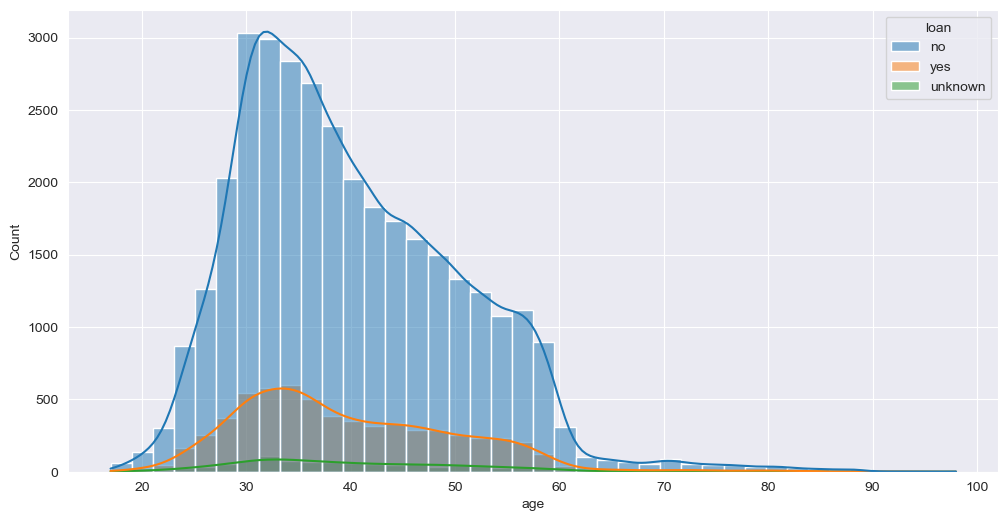

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='age',bins=40, hue='loan', kde=True)

<Axes: xlabel='pdays', ylabel='Count'>

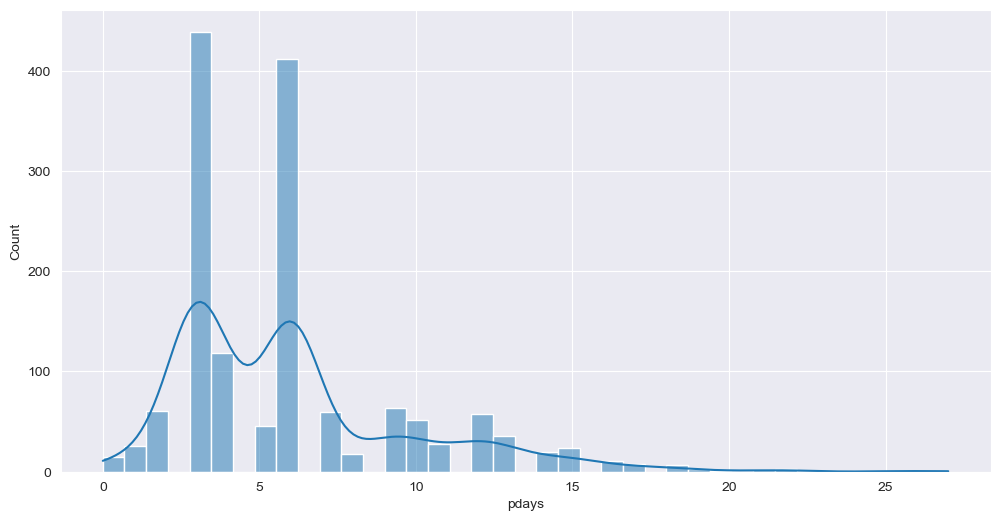

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(data=df[df['pdays']!=999], x='pdays', kde=True)
# plt.xlim(0,100)

In [8]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

(0.0, 1000.0)

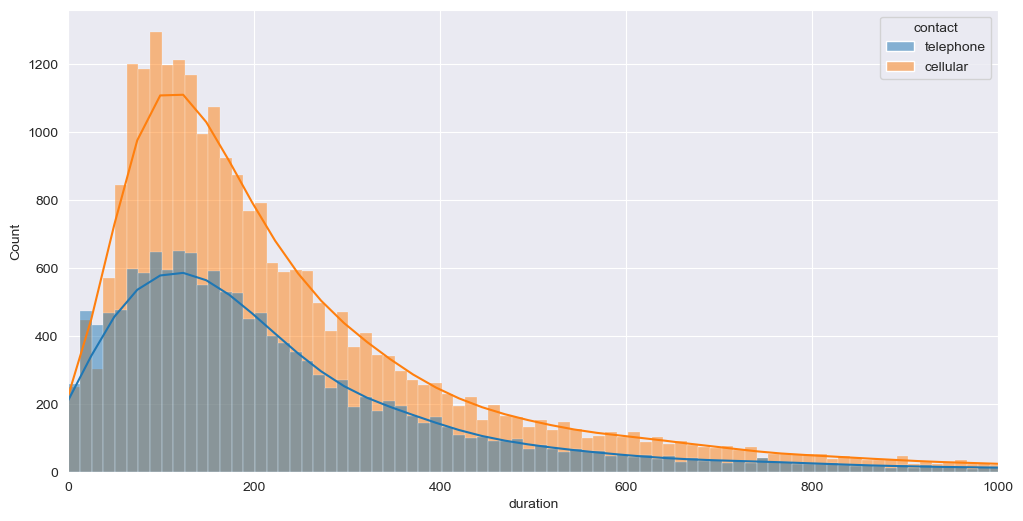

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='duration', hue='contact', kde=True)
plt.xlim(0,1000)

<Axes: xlabel='contact', ylabel='count'>

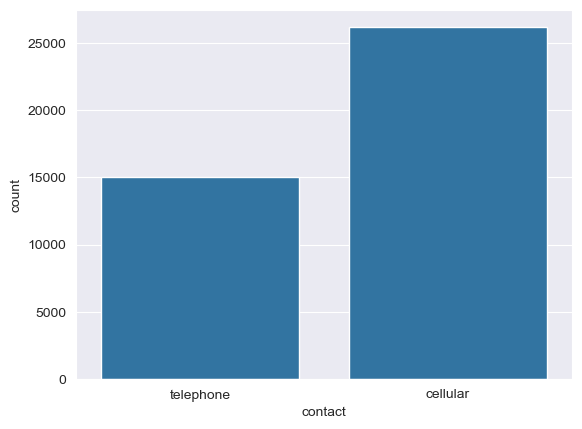

In [10]:
sns.countplot(data=df, x='contact')

In [11]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


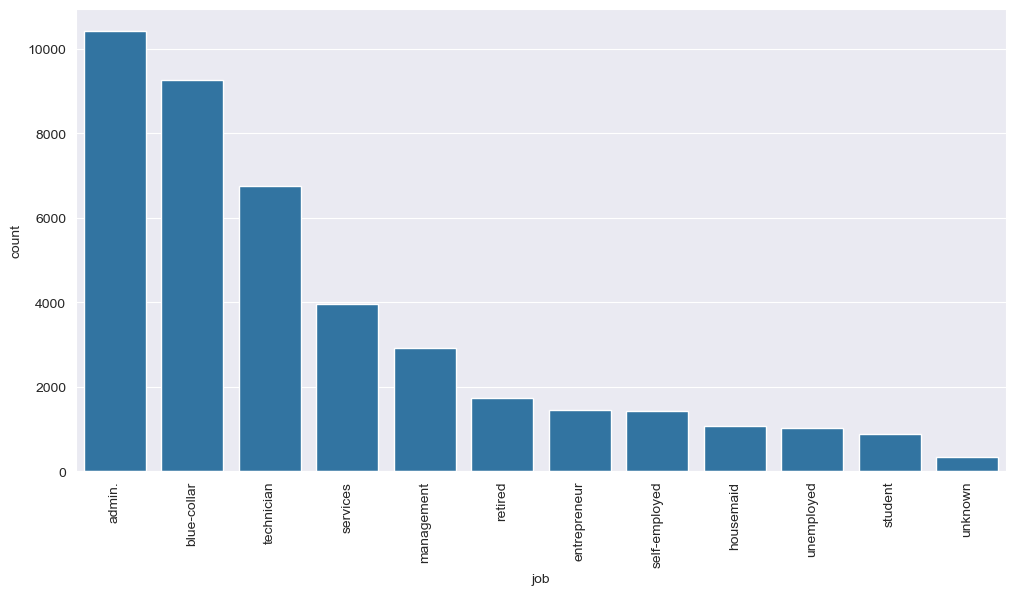

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90);

<Axes: xlabel='job', ylabel='count'>

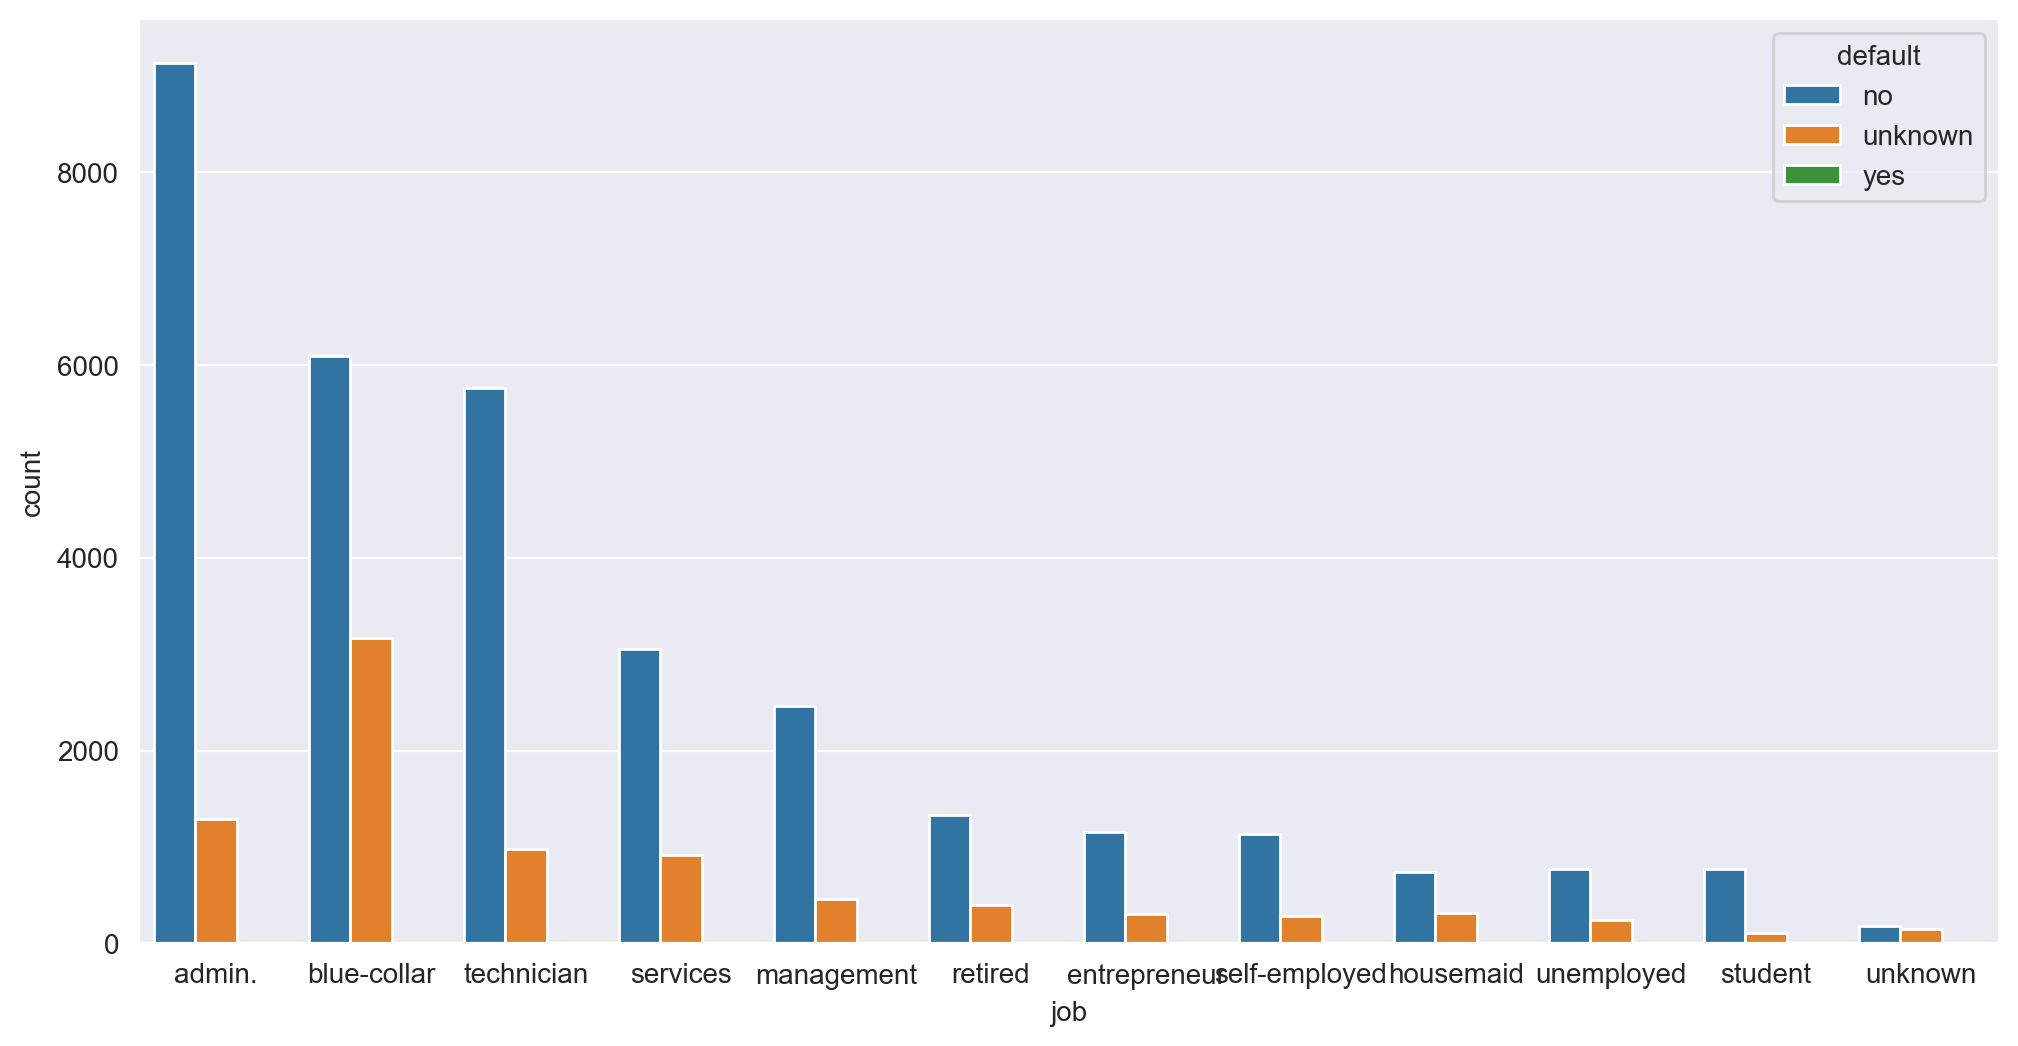

In [13]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='job', order=df['job'].value_counts().index, hue='default')

In [14]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

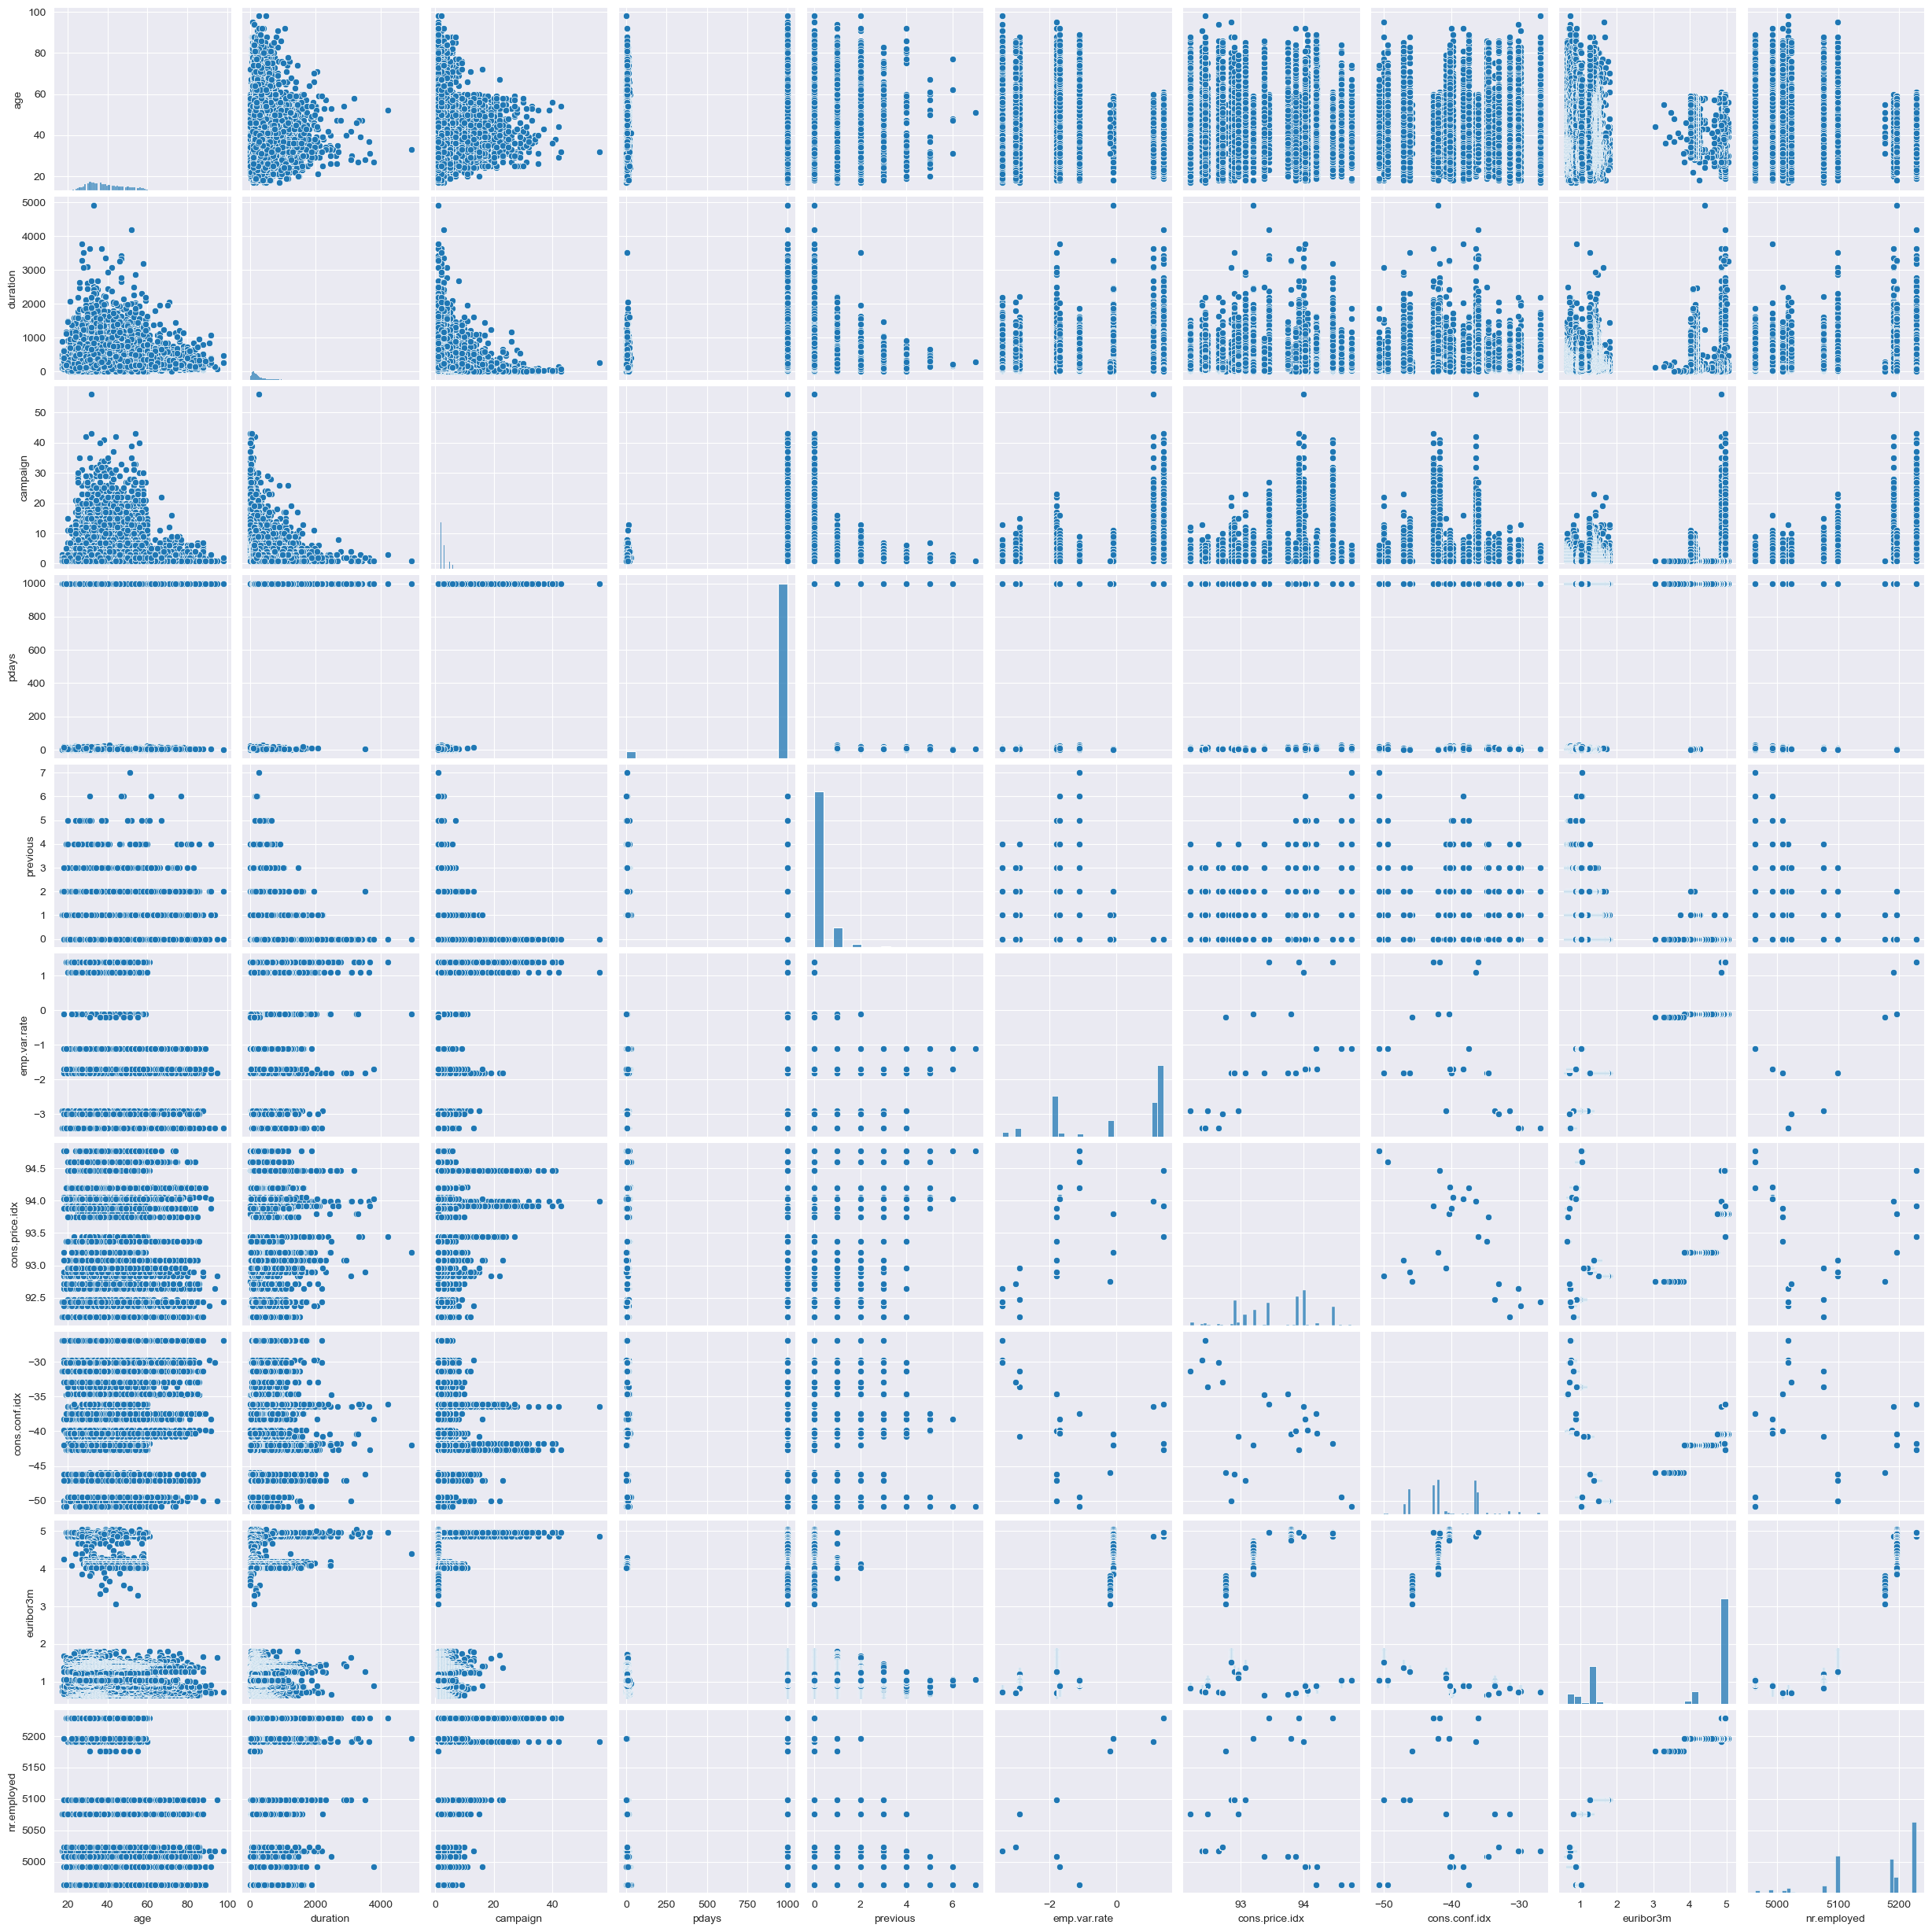

In [15]:
sns.pairplot(df)

# 199. K-Means Clustering Coding Part Two

In [16]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [17]:
X = pd.get_dummies(df)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X = scaler.fit_transform(X)

In [21]:
scaled_X

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

In [22]:
from sklearn.cluster import KMeans

In [23]:
model = KMeans(n_clusters=2)

In [24]:
# fit_transform
cluster_labels = model.fit_predict(scaled_X)

In [25]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [26]:
X['Cluster'] = cluster_labels

<Axes: >

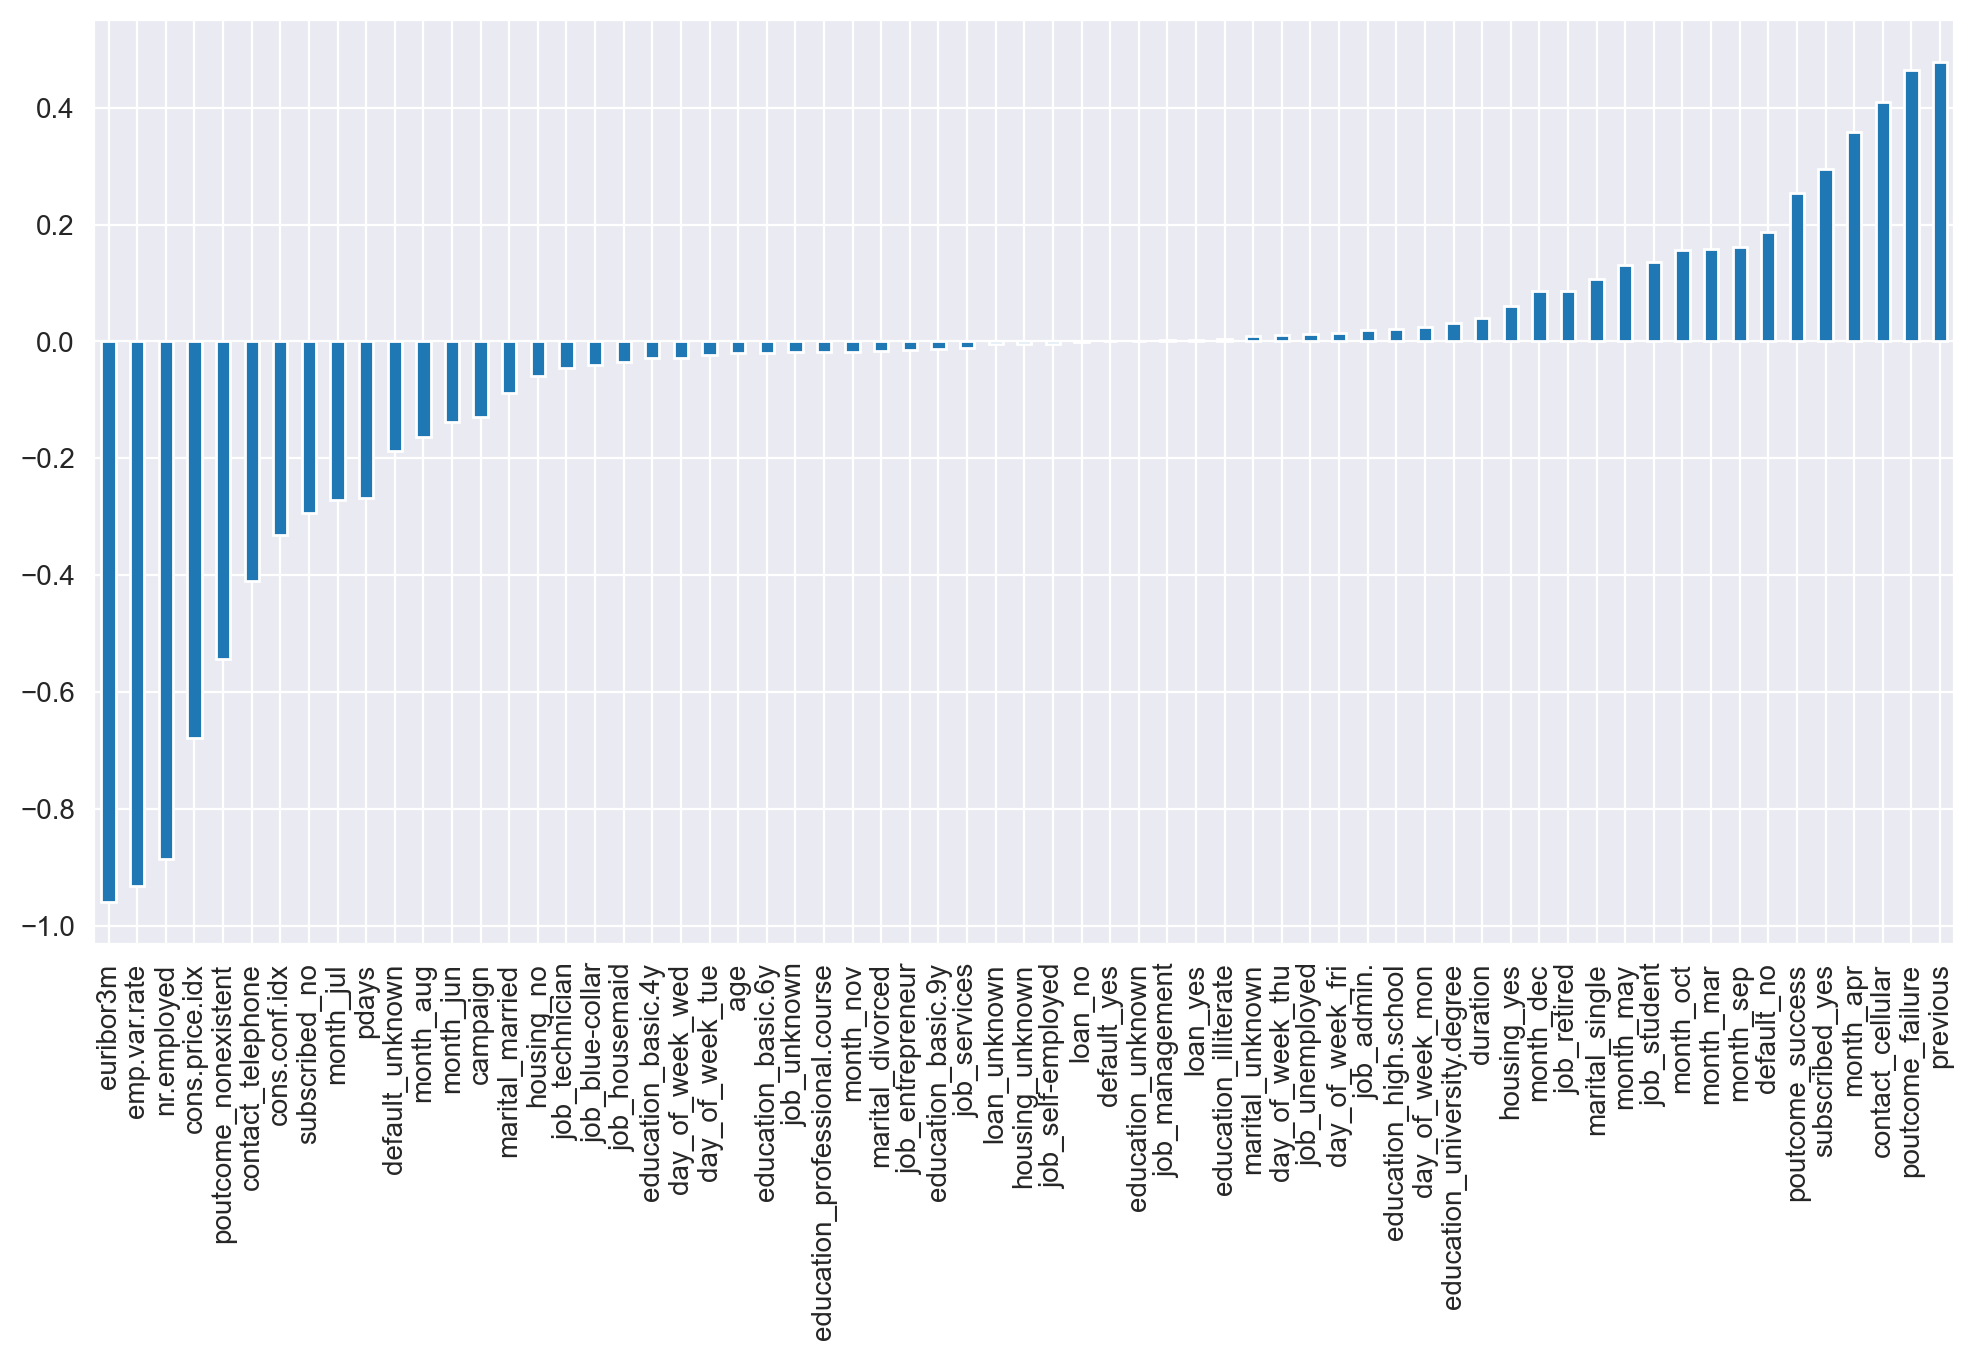

In [27]:
plt.figure(figsize=(12,6), dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

# 200. K-Means Clustering Coding Part Three

In [28]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

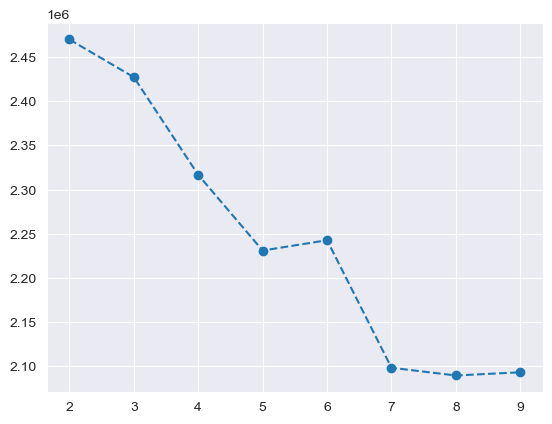

In [30]:
plt.plot(range(2,10),ssd,'o--')

<Axes: >

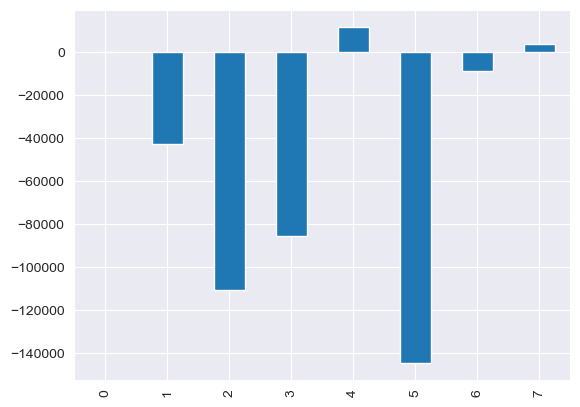

In [31]:
pd.Series(ssd).diff().plot(kind='bar')

In [32]:
pd.Series(ssd).diff()

0              NaN
1    -42669.268584
2   -110530.985038
3    -85650.467418
4     11719.117565
5   -144346.299815
6     -8739.235330
7      3613.628959
dtype: float64

# 201. K-Means Color Quantization - Part One

# 202. K-Means Color Quantization - Part Two

In [33]:
import numpy as np
import matplotlib.pyplot as plt


In [34]:
import matplotlib.image as mpimg
# .jpg .png ----> numpy array

In [38]:
image_as_array = mpimg.imread('../DATA/palm_trees.jpg')

In [40]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [41]:
image_as_array.shape # 3 channels High, Width, Color

(1401, 934, 3)

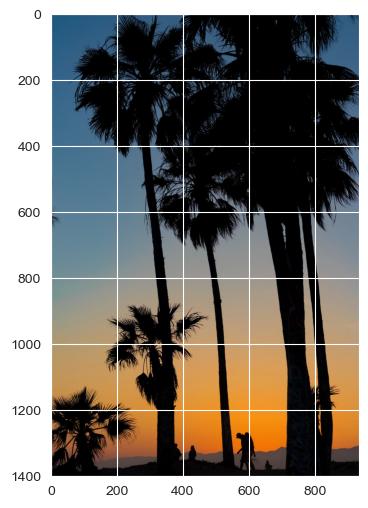

In [43]:
plt.figure(figsize=(12,6))
plt.imshow(image_as_array)

In [45]:
# 3 channels (High, Width, Color) 

In [46]:
hight, width, color = image_as_array.shape

In [48]:
image_as_array2d = image_as_array.reshape(hight*width, color)

In [50]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [51]:
len(image_as_array2d.shape)

2

In [52]:
from sklearn.cluster import KMeans

In [53]:
model = KMeans(n_clusters=6) # Quantization 6 colors

In [54]:
labels = model.fit_predict(image_as_array2d)

In [56]:
1401*934

1308534

In [60]:
labels

array([3, 3, 3, ..., 2, 2, 2])

In [63]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [65]:
rgb_codes

array([[ 67,  62,  62],
       [195, 155, 105],
       [  3,   3,   4],
       [ 72, 110, 138],
       [219, 134,  44],
       [141, 145, 143]])

In [66]:
rgb_codes[labels] 

array([[ 72, 110, 138],
       [ 72, 110, 138],
       [ 72, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [67]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [71]:
quantized_image = np.reshape(rgb_codes[labels], (hight, width, color))

In [72]:
quantized_image

array([[[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

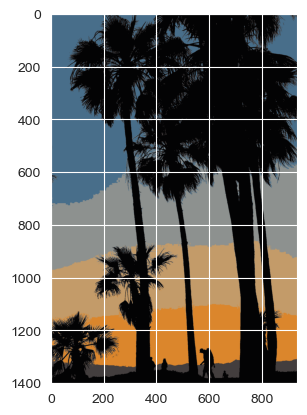

In [73]:
plt.imshow(quantized_image)

# 203. K-Means Clustering Exercise Overview